<a href="https://colab.research.google.com/github/tarhi/Cas-de-Covid-et-d-c-s/blob/main/Cas_de_Covid_et_d%C3%A9c%C3%A8s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importation et 1er lecture de la base donnée 2022_population.csv

df_pop = pd.read_csv('/content/2022_population.csv')
df_pop.head()

,iso_code,country,2022_last_updated,2021_population,area_sq_km,land_area_sq_km,density_/sq_km,growth_rate,world_%,rank
0,CHN,China,"1,425,849,077","1,425,893,465",9.7M,9.4M,151,0.00%,17.88%,1
1,IND,India,"1,422,076,805","1,407,563,842",3.3M,3M,477,0.68%,17.77%,2
2,USA,United States,"339,088,530","336,997,624",9.4M,9.1M,37,0.38%,4.24%,3
3,IDN,Indonesia,"276,395,662","273,753,191",1.9M,1.9M,147,0.64%,3.45%,4
4,PAK,Pakistan,"238,149,145","231,402,117",881.9K,770.9K,306,1.91%,2.96%,5


In [ ]:
df_pop.shape

(228, 10)

In [ ]:
df_pop.columns.tolist()

['iso_code',
 'country',
 '2022_last_updated',
 '2021_population',
 'area_sq_km',
 'land_area_sq_km',
 'density_/sq_km',
 'growth_rate',
 'world_%',
 'rank']

In [ ]:
df_pop.dtypes

iso_code             object
country              object
2022_last_updated    object
2021_population      object
area_sq_km           object
land_area_sq_km      object
density_/sq_km       object
growth_rate          object
world_%              object
rank                  int64
dtype: object

aprés petite lecture de cette base de donnée j'ai décider de me concenter seulement sur les variable suivant:


In [ ]:
df_pop = df_pop[['country','2022_last_updated','2021_population']]
df_pop.head()

,country,2022_last_updated,2021_population
0,China,"1,425,849,077","1,425,893,465"
1,India,"1,422,076,805","1,407,563,842"
2,United States,"339,088,530","336,997,624"
3,Indonesia,"276,395,662","273,753,191"
4,Pakistan,"238,149,145","231,402,117"


importation et 1er lecture de la base de données covid_worldwide.csv


In [ ]:
df_covid = pd.read_csv('/content/covid_worldwide.csv')
df_covid.head()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


In [ ]:
df_covid.shape

(231, 8)

In [ ]:
df_covid.columns

Index(['Serial Number', 'Country', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Active Cases', 'Total Test', 'Population'],
      dtype='object')

aprés la 1er lecture j'ai décider de continuer avec les variables suivant:


In [ ]:
df_covid = df_covid[['Country', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Active Cases', 'Total Test']]
df_covid.head()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test
0,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679"
1,India,"44,682,784","530,740","44,150,289","1,755","915,265,788"
2,France,"39,524,311","164,233","39,264,546","95,532","271,490,188"
3,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384"
4,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166"


In [ ]:
df_covid = df_covid.rename({'Country': 'country'}, axis=1)

df_covid.head()
                                                   

,country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test
0,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679"
1,India,"44,682,784","530,740","44,150,289","1,755","915,265,788"
2,France,"39,524,311","164,233","39,264,546","95,532","271,490,188"
3,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384"
4,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166"


In [ ]:
df_covid.dtypes

country            object
Total Cases        object
Total Deaths       object
Total Recovered    object
Active Cases       object
Total Test         object
dtype: object

In [ ]:
df_covid['country'] = df_covid['country'].replace({'USA': 'United States'})

ensuite je vais merger les deux bases de données en une seule.


In [ ]:
df = df_pop.merge(df_covid,how='inner', on="country")
df.head()

,country,2022_last_updated,2021_population,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test
0,China,"1,425,849,077","1,425,893,465","503,302","5,272","379,053","118,977","160,000,000"
1,India,"1,422,076,805","1,407,563,842","44,682,784","530,740","44,150,289","1,755","915,265,788"
2,United States,"339,088,530","336,997,624","104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679"
3,Indonesia,"276,395,662","273,753,191","6,730,289","160,817","6,565,208","4,264","114,158,919"
4,Pakistan,"238,149,145","231,402,117","1,576,313","30,640","1,538,689","6,984","30,570,862"


In [ ]:
df.columns

Index(['country', '2022_last_updated', '2021_population', 'Total Cases',
       'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Test'],
      dtype='object')

In [ ]:
df = df.rename({"2022_last_updated": "population_2022"},axis=1)


In [ ]:
df = df.rename({"2021_population": "population_2021"},axis=1)

In [ ]:
df = df.rename({"Total Cases": "Total_Cases"},axis=1)
df = df.rename({"Total Deaths": "Total_Deaths"},axis=1)
df = df.rename({"Total Recovered": "Total_Recovered"},axis=1)
df = df.rename({"Active Cases": "Active_Cases"},axis=1)
df = df.rename({"Total Test": "Total_Test"},axis=1)

In [ ]:
df.head()

,country,population_2022,population_2021,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Total_Test
0,China,"1,425,849,077","1,425,893,465","503,302","5,272","379,053","118,977","160,000,000"
1,India,"1,422,076,805","1,407,563,842","44,682,784","530,740","44,150,289","1,755","915,265,788"
2,United States,"339,088,530","336,997,624","104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679"
3,Indonesia,"276,395,662","273,753,191","6,730,289","160,817","6,565,208","4,264","114,158,919"
4,Pakistan,"238,149,145","231,402,117","1,576,313","30,640","1,538,689","6,984","30,570,862"


In [ ]:
df.describe()

,country,population_2022,population_2021,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Total_Test
count,196,196,196,196,191,180,182,182
unique,196,196,196,196,186,180,161,182
top,China,"1,425,849,077","1,425,893,465","503,302",21,"379,053",0,"160,000,000"
freq,1,1,1,1,2,1,5,1


In [ ]:
# analyse des données des country les plus populaire
df[df['country'].isin(['China', 'India','United States'])]


,country,population_2022,population_2021,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Total_Test
0,China,"1,425,849,077","1,425,893,465","503,302","5,272","379,053","118,977","160,000,000"
1,India,"1,422,076,805","1,407,563,842","44,682,784","530,740","44,150,289","1,755","915,265,788"
2,United States,"339,088,530","336,997,624","104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679"


In [ ]:
df['population_2021'] = df['population_2021'].apply(lambda x: x.replace(",",""))
df['population_2021'] = df['population_2021'].apply(lambda x: x.replace(",",""))
df['population_2021'] = df['population_2021'].astype(float)

In [ ]:
df['population_2022'] = df['population_2022'].apply(lambda x: x.replace(",",""))
df['population_2022'] = df['population_2022'].apply(lambda x: x.replace(",",""))
df['population_2022'] = df['population_2022'].astype(float)

In [ ]:
df['Total_Cases'] = df['Total_Cases'].apply(lambda x: x.replace("'",""))
df['Total_Cases'] = df['Total_Cases'].apply(lambda x: x.replace(",",""))
df['Total_Cases'] = df['Total_Cases'].astype(float)

In [ ]:
df.dtypes

country             object
population_2022    float64
population_2021    float64
Total_Cases        float64
Total_Deaths        object
Total_Recovered     object
Active_Cases        object
Total_Test          object
dtype: object

In [ ]:
# df['Total_Recovered'] = df['Total_Recovered'].apply(lambda x: x.replace(",",""))
# df['Total_Recovered'] = df['Total_Recovered'].apply(lambda x: x.replace("'","")) 
# df['Total_ Recovered'] = df['Total_Recovered'].astype(float)


In [ ]:
# v1= lambda x:float(x[1:-1])
# df["Total_Test"] = df["Total_Test"].apply(v1)

In [ ]:
df.head()

,country,population_2022,population_2021,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Total_Test
0,China,1.425849e+09,1.425893e+09,503302.0,"5,272","379,053","118,977","160,000,000"
1,India,1.422077e+09,1.407564e+09,44682784.0,"530,740","44,150,289","1,755","915,265,788"
2,United States,3.390885e+08,3.369976e+08,104196861.0,"1,132,935","101,322,779","1,741,147","1,159,832,679"
3,Indonesia,2.763957e+08,2.737532e+08,6730289.0,"160,817","6,565,208","4,264","114,158,919"
4,Pakistan,2.381491e+08,2.314021e+08,1576313.0,"30,640","1,538,689","6,984","30,570,862"


In [ ]:
df.isnull().sum()


country             0
population_2022     0
population_2021     0
Total_Cases         0
Total_Deaths        5
Total_Recovered    16
Active_Cases       14
Total_Test         14
dtype: int64

In [ ]:
# filter les données manquante
df[df['Total_Deaths'].isnull()]

,country,population_2022,population_2021,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Total_Test
190,Tuvalu,11312.0,11204.0,2805.0,NaN,NaN,"2,805",NaN
192,Falkland Islands,3780.0,3764.0,1930.0,NaN,"1,930",0,"8,632"
193,Niue,1934.0,1937.0,747.0,NaN,746,1,NaN
194,Tokelau,1871.0,1849.0,5.0,NaN,NaN,5,NaN
195,Vatican City,510.0,511.0,29.0,NaN,29,0,NaN


In [ ]:
df[df['Total_Test'].isnull()]

,country,population_2022,population_2021,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Total_Test
19,Tanzania,66465402.0,63588334.0,42664.0,846,NaN,NaN,NaN
89,Tajikistan,10050031.0,9750064.0,17786.0,125,"17,264",397,NaN
99,Nicaragua,6997811.0,6850540.0,18491.0,225,"4,225","14,041",NaN
146,Comoros,844745.0,821625.0,8992.0,161,"8,827",4,NaN
149,Solomon Islands,732244.0,707851.0,24575.0,153,NaN,NaN,NaN
153,Western Sahara,582363.0,565581.0,10.0,1,9,0,NaN
163,French Polynesia,307873.0,304032.0,77957.0,649,NaN,NaN,NaN
168,Kiribati,132826.0,128874.0,5008.0,18,"2,703","2,287",NaN
171,Seychelles,107118.0,106471.0,50665.0,172,"50,440",53,NaN
180,Marshall Islands,41569.0,42050.0,15584.0,17,"15,528",39,NaN


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(170, 8)

In [ ]:
df.dtypes

country             object
population_2022    float64
population_2021    float64
Total_Cases        float64
Total_Deaths        object
Total_Recovered     object
Active_Cases        object
Total_Test          object
dtype: object

In [ ]:
# ajouter une colonne pour calculer le % cas par raport a la population
df["taux"] = df['Total_Cases'] / df['population_2022'] * 100

<ipython-input-134-a3e51641ed34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["taux"] = df['Total_Cases'] / df['population_2022'] * 100


In [ ]:
df.head()

,country,population_2022,population_2021,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Total_Test,taux
0,China,1.425849e+09,1.425893e+09,503302.0,"5,272","379,053","118,977","160,000,000",0.035298
1,India,1.422077e+09,1.407564e+09,44682784.0,"530,740","44,150,289","1,755","915,265,788",3.142080
2,United States,3.390885e+08,3.369976e+08,104196861.0,"1,132,935","101,322,779","1,741,147","1,159,832,679",30.728512
3,Indonesia,2.763957e+08,2.737532e+08,6730289.0,"160,817","6,565,208","4,264","114,158,919",2.435020
4,Pakistan,2.381491e+08,2.314021e+08,1576313.0,"30,640","1,538,689","6,984","30,570,862",0.661902


In [ ]:
df['Total_Test'].describe()

count             170
unique            170
top       160,000,000
freq                1
Name: Total_Test, dtype: object

In [ ]:
df['Total_Test'].min()

'1,009,957'

Text(0.5, 1.0, 'graph total cases par country')

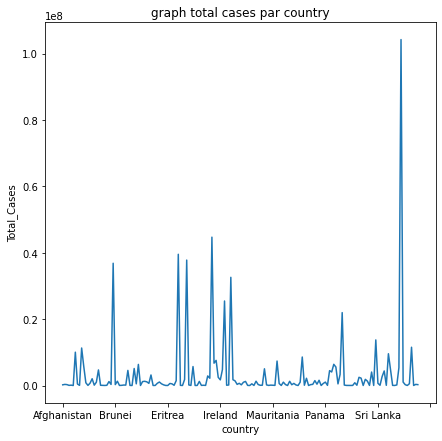

In [ ]:
df.groupby("country")["Total_Cases"].sum().plot(figsize=[7,7])
plt.xlabel("country")
plt.ylabel("Total_Cases")
plt.title("graph total cases par country")

In [ ]:
df[df['country'].isin(['India','United States'])]

,country,population_2022,population_2021,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Total_Test,taux
